<a href="https://colab.research.google.com/github/deanzedd/Machine-Learning/blob/main/dimen_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVD(Singular Value Decomposition)

tinsh SVD của 1 ma trận

In [ ]:
from __future__ import print_function
import numpy as np
from numpy import linalg as LA

m, n = 3, 4
A = np.random.random((m, n))
print(A)
U, S, V = LA.svd(A) # A = U*S*V (no V transpose here)

print("Frobenius norm of (UU^T- I) =", LA.norm(U.dot(U.T)- np.eye(m))) #-> U is orthogonal
print("S =", S)
print("Frobenius norm of (VV^T- I) =", LA.norm(V.dot(V.T)- np.eye(n))) #-> V is orthogonal



[[0.95925424 0.60176944 0.84172412 0.71225908]
 [0.29052635 0.35038873 0.93014397 0.5058    ]
 [0.49577813 0.33342759 0.25417714 0.54446965]]
Frobenius norm of (UU^T- I) = 5.05125053724777e-16
S = [2.06697709 0.4906031  0.17670419]
Frobenius norm of (VV^T- I) = 1.272253197282883e-15


#PCA

ví dụ trên eigenface(khuôn mặt riêng) với Yale Face Database

In [44]:
import numpy as np
from scipy import misc

#Incremental PCA

Ý tưởng: Thay vì lấy toàn bộ dataset để tính PCA thì ta chia dữ liệu thành các lô nhỏ(giống mini-batch của GD) để cập nhật các principle component

Ưu điểm: - tính được trên lượng dữ liệu lớn

tiết kiệm bộ nhớ và làm việc với dữ liệu online
      
Nhược điểm: tính toán chậm, có thể accuracy thấp hơn PCA truyền thống

Ví dụ về incremental PCA với bài toán classification trên tập dữ liệu MNIST

In [45]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [46]:
mnist = fetch_openml('mnist_784', version =1)
X, y = mnist.data, mnist.target


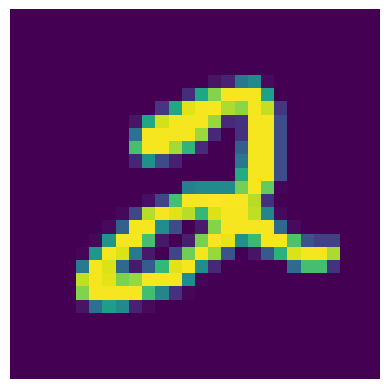

In [47]:
examp = X.iloc[5]
examp = examp.values.reshape(28,28)
plt.imshow(examp)
plt.axis('off')
plt.show()

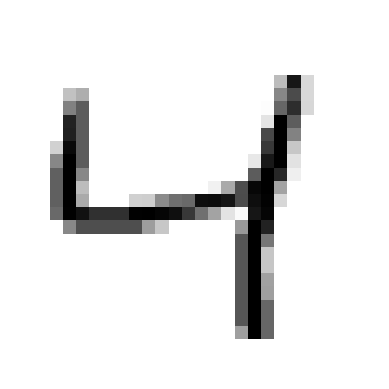

In [48]:
examp = X.iloc[2]
examp_image= np.reshape(np.ravel(examp), (28,28))
plt.imshow(examp_image, cmap= "binary") #chỉnh màu của ảnh ở phần cmap
plt.axis('off')
plt.show()

In [49]:
batch_size = None

In [50]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(X)

In [51]:
nums = range(100, 784, 50)

In [52]:
var_ratio = []
for num in nums:
  ipca = IncrementalPCA(n_components= num, batch_size = batch_size)
  ipca.fit(scale_data)
  var_ratio.append(np.sum(ipca.explained_variance_ratio_))


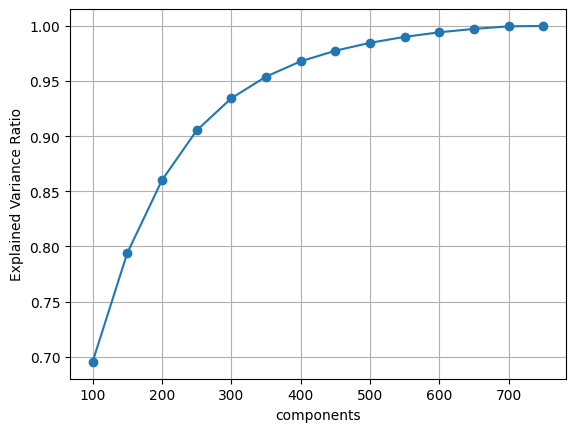

In [54]:
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [70]:
ipca = IncrementalPCA(n_components = 200, batch_size = batch_size)
x_new = ipca.fit_transform(scale_data)

In [57]:
x_train, x_test = X[:8000], X[8001:10000]

y_train, y_test = y[:8000], y[8001:10000]

In [64]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [65]:
y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9349674837418709

In [71]:
x_train, x_test = x_new[:8000], x_new[8001:10000]
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9069534767383692

2 kq 1 cái dựa vào knn và 1 cái dựa vào knn kết hợp incremental PCA thì độ chính xác của incrementlPCA thấp hơn 1 tí nhuwnng tốc độ tiền xử lí nhanh hơn